In [58]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'


raw_dataset = pd.read_csv(url, names=["MPG",	"Cylinders",	"Displacement",	"Horsepower",	"Weight",	"Acceleration",	"Model Year",	"Origin"],
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [59]:
raw_dataset.isnull().any()

MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
Origin          False
dtype: bool

In [60]:
raw_dataset["Horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [61]:
median = raw_dataset["Horsepower"].median()
raw_dataset["Horsepower"].fillna(median, inplace=True)

In [62]:
from sklearn.preprocessing import MinMaxScaler

num_columns = ['MPG', 'Cylinders', 'Displacement','Horsepower','Weight','Acceleration']


min_max_scaler = MinMaxScaler()
raw_dataset[num_columns] = min_max_scaler.fit_transform(raw_dataset[num_columns])

print("Normalized DataFrame:")
raw_dataset

Normalized DataFrame:


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,70,1
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,70,1
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,70,1
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,70,1
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,70,1
...,...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,82,1
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,82,2
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,82,1
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,82,1


In [75]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=7, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error',metrics="mse")


In [76]:
from sklearn.model_selection import train_test_split

X = raw_dataset.drop('MPG', axis=1)
y = raw_dataset['MPG']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 2s 127ms/step - loss: 0.5587 - mse: 0.5587 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1956 - mse: 0.1956 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.1956 - mse: 0.1956 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.1956 - mse: 0.1956 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.1956 - mse: 0.1956 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.1956 - mse: 0.1956 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1956 - mse: 0.1956 - val_loss: 0.1941 - val_mse: 0.1941
Epoch 8/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1956 - mse: 0.1956 - val_lo

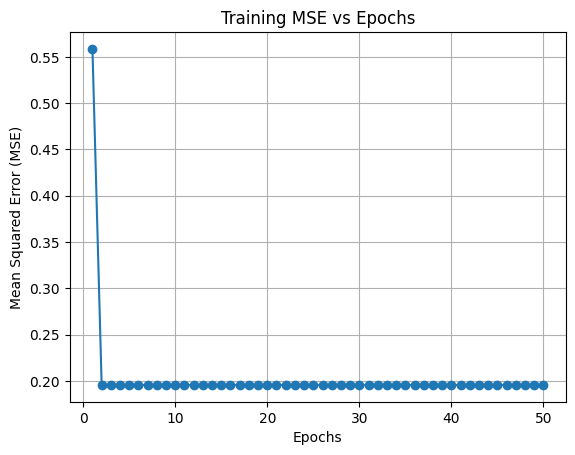

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Extract MSE values from history
mse_values = history.history['loss']

# Plot MSE vs epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o')
plt.title('Training MSE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [74]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Step 1: Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Step 2: Preprocess the data
# Reshape and normalize the images
train_images = train_images.reshape((60000, 28 * 28)) / 255.0
test_images = test_images.reshape((10000, 28 * 28)) / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Step 3: Define the neural network architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model on the training data
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Step 6: Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
375/375 [==============================] - 6s 16ms/step - loss: 0.2951 - accuracy: 0.9139 - val_loss: 0.1479 - val_accuracy: 0.9592
Epoch 2/5
375/375 [==============================] - 5s 12ms/step - loss: 0.1202 - accuracy: 0.9650 - val_loss: 0.1179 - val_accuracy: 0.9655
Epoch 3/5
375/375 [==============================] - 5s 12ms/step - loss: 0.0798 - accuracy: 0.9769 - val_loss: 0.0873 - val_accuracy: 0.9728
Epoch 4/5
375/375 [==============================] - 6s 15ms/step - loss: 0.0570 - accuracy: 0.9832 - val_loss: 0.0783 - val_accuracy: 0.9760
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0654 - accuracy: 0.9803
Test accuracy: 0.9803000092506409


In [79]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Step 1: Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Step 2: Filter the data to only include the numbers 7 and 9
# Filter training data
train_mask = np.isin(train_labels, [7, 9])
train_images = train_images[train_mask]
train_labels = train_labels[train_mask]

# Filter test data
test_mask = np.isin(test_labels, [7, 9])
test_images = test_images[test_mask]
test_labels = test_labels[test_mask]

# Step 3: Preprocess the data
# Reshape and normalize the images
train_images = train_images.reshape((train_images.shape[0], 28 * 28)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28 * 28)) / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Step 4: Define the neural network architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Step 5: Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model on the training data
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Step 7: Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
77/77 [==============================] - 2s 16ms/step - loss: 0.1993 - accuracy: 0.9255 - val_loss: 0.0885 - val_accuracy: 0.9722
Epoch 2/5
77/77 [==============================] - 1s 13ms/step - loss: 0.0730 - accuracy: 0.9764 - val_loss: 0.0546 - val_accuracy: 0.9828
Epoch 3/5
77/77 [==============================] - 1s 13ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0404 - val_accuracy: 0.9885
Epoch 4/5
77/77 [==============================] - 1s 16ms/step - loss: 0.0324 - accuracy: 0.9889 - val_loss: 0.0439 - val_accuracy: 0.9865
Epoch 5/5
64/64 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9882
Test accuracy: 0.9882179498672485


In [81]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the neural network architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_images_flat.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images_flat, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images_flat, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
625/625 [==============================] - 25s 38ms/step - loss: 1.8971 - accuracy: 0.3147 - val_loss: 1.7424 - val_accuracy: 0.3861
Epoch 2/10
625/625 [==============================] - 23s 37ms/step - loss: 1.7084 - accuracy: 0.3828 - val_loss: 1.6783 - val_accuracy: 0.3965
Epoch 3/10
625/625 [==============================] - 23s 37ms/step - loss: 1.6210 - accuracy: 0.4191 - val_loss: 1.6180 - val_accuracy: 0.4195
Epoch 4/10
625/625 [==============================] - 25s 39ms/step - loss: 1.5564 - accuracy: 0.4435 - val_loss: 1.5711 - val_accuracy: 0.4403
Epoch 5/10
625/625 [==============================] - 25s 40ms/step - loss: 1.5116 - accuracy: 0.4605 - val_loss: 1.5157 - val_accuracy: 0.4643
Epoch 6/10
625/625 [==============================] - 24s 38ms/step - loss: 1.4666 - accuracy: 0.4740 - val_loss: 1.5479 - val_accuracy: 0.4491
Epoch 7/10
625/625 [==============================] - 25s 39ms/step - loss: 1.4318 - accuracy: 0.4880 - val_loss: 1.5218 - val_accuracy:

In [84]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

# Load the MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()

# Preprocess the data
# Normalize the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
# Flatten the images
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder on the training data
autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

# Evaluate the autoencoder on the test data
decoded_images = autoencoder.predict(test_images)

# Compute the reconstruction error
reconstruction_error = np.mean(np.square(test_images - decoded_images))

print('Reconstruction error on test images:', reconstruction_error)

Epoch 1/10
469/469 [==============================] - 8s 14ms/step - loss: 0.2023 - val_loss: 0.1394
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1295 - val_loss: 0.1206
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1172 - val_loss: 0.1118
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1100 - val_loss: 0.1059
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1051 - val_loss: 0.1017
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1018 - val_loss: 0.0992
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0994 - val_loss: 0.0973
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0976 - val_loss: 0.0957
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0961 - val_loss: 0.0944
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Reconstruction error on 

In [86]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Add noise to the images
noise_factor = 0.5
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)

# Clip the pixel values to stay within the range [0, 1]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder on the noisy images
autoencoder.fit(train_images_noisy, train_images, epochs=10, batch_size=128, shuffle=True, validation_data=(test_images_noisy, test_images))

# Evaluate the autoencoder on the test data
decoded_images = autoencoder.predict(test_images_noisy)

# # Train a classifier on the original images
# classifier = Sequential()
# classifier.add(Dense(512, activation='relu', input_shape=(784,)))
# classifier.add(Dense(10, activation='softmax'))
# classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# classifier.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

# Evaluate the classifier on the noisy images
classifier_loss, classifier_accuracy = classifier.evaluate(decoded_images, test_labels)
print('Classifier accuracy on noisy images:', classifier_accuracy)

Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 0.2290 - val_loss: 0.1761
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1638 - val_loss: 0.1550
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1518 - val_loss: 0.1469
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1448 - val_loss: 0.1408
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1396 - val_loss: 0.1364
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1361 - val_loss: 0.1336
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1335 - val_loss: 0.1321
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1313 - val_loss: 0.1304
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1293 - val_loss: 0.1278
Epoch 10/10
313/313 [==============================] - 1s 4ms/step
Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 2) and (None, 10) are incompatible
